In [2]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as manimation
import os
from matplotlib.animation import FuncAnimation
import imageio
import os
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

In [5]:
def save_figure(filenames, frame):
    filename = f'frames/frame_{frame:04d}.png'
    filenames.append(filename)
    plt.savefig(filename, dpi=300)
    return filenames

def ac_calculate(signal1, signal2):
    return np.sum(signal1 * signal2) / len(signal1)

def sine_wave(t, frequency=1.0, amplitude=1.0, phase=0.0):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def triple_sine(t, frequency=1.0, amplitude=1.0, phase=0.0):
    period1 = 10.0/0.15
    period2 = 10.0/7
    period3 = 10.0/16
    return (1.0 * np.sin(2 * np.pi / period1 * t - np.pi/7)+
            0.3 * np.sin(2 * np.pi / period2 * t - np.pi/3)+
            0.1 * np.sin(2 * np.pi / period3 * t - np.pi/2))

def mixed(alpha, t):
    return alpha * sine_wave(t) + (1 - alpha) * (np.random.random(len(t)) - 0.5)



In [4]:
df = pd.read_csv('jerusalem_temperature.csv',
                #  encoding = "ISO-8859-8",  # this shows hebrew characters properly
                 na_values=["-"]           # substitute "-" for NaN
                 )
df['timestamp'] = pd.to_datetime(df['Date & Time (Summer)'], dayfirst=True)
df = df.set_index('timestamp')
temperature = df['Temperature (°C)'].values

/var/folders/kv/9cqw3y_s6c75xmgqm9n0t5d40000gn/T/ipykernel_64000/710175636.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


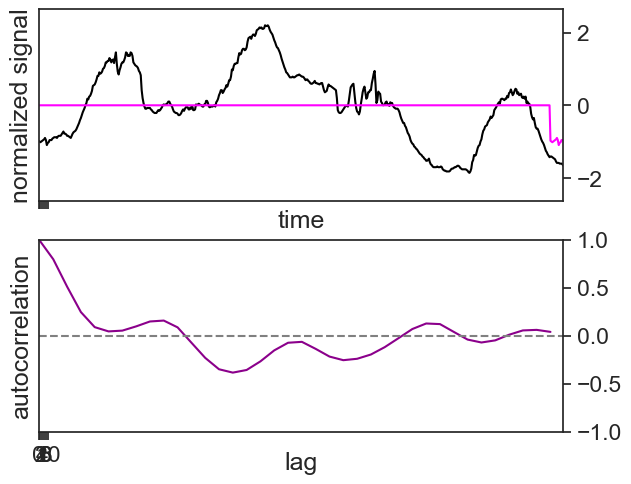

In [7]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(left=0.06, right=0.88, bottom=0.1, top=0.98, hspace=0.2)

# Create time array
dt = 0.01
t = np.arange(0, 10+dt, dt)
# Create signal
# signal = sine_wave(t)
# signal = triple_sine(t)
# signal = mixed(0.2, t)
signal = temperature.copy()
avg = signal.mean()
std = signal.std()
signal = (signal - avg)/std
dt = 1
t = np.arange(0, len(signal), dt)

tau = [0]
ac = [ac_calculate(signal, signal)]
filenames = []

# Create a directory to store the frames
if not os.path.exists('frames'):
    os.makedirs('frames')

# Initialize line objects
line1, = ax1.plot(t, signal, color="black")
line2, = ax1.plot(t, signal, color="fuchsia")
line_ac, = ax2.plot(tau, ac, color="darkmagenta")
ax2.axhline(0, color='gray', linestyle='--')

ax1.set(ylim=[-1.2 * signal.max(), 1.2 * signal.max()],
        ylabel="normalized signal",
        )
ax1.set_xlabel("time", labelpad=0)
ax2.set(xlim=[t.min(), t.max()],
        ylim=[-ac[0], ac[0]],
        ylabel="autocorrelation",
        xticks=np.arange(0,11,2)
        )
ax2.set_xlabel("lag", labelpad=-10)

ax1.yaxis.tick_right()
ax2.yaxis.tick_right()

frame = 0
filenames = save_figure(filenames, frame)

# Generate and save the frames
for frame in np.arange(1,len(t)-1, 15):
    
    shifted_signal = np.roll(signal, frame)
    shifted_signal[:frame] = 0.0
    line2.set_data(t, shifted_signal)

    tau.append(frame * dt)
    ac.append(ac_calculate(signal, shifted_signal))
    line_ac.set_data(tau, ac)
    
    # Redraw the figure
    fig.canvas.draw()

    # Save the frame as a .png image
    filenames = save_figure(filenames, frame)

# Stitch the frames into a .mp4 video
with imageio.get_writer('autocorrelation.mp4', mode='I', fps=24) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Delete the frames
for filename in filenames:
    os.remove(filename)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

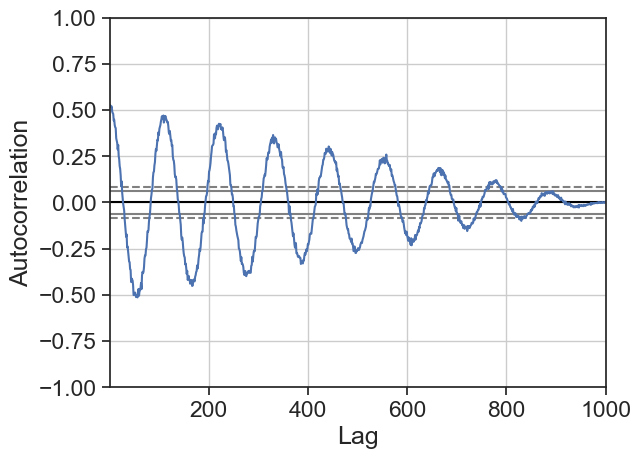

In [87]:
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
s = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
pd.plotting.autocorrelation_plot(s)

In [93]:
%matplotlib widget
s2 = pd.Series(data)
pd.plotting.autocorrelation_plot(s2)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

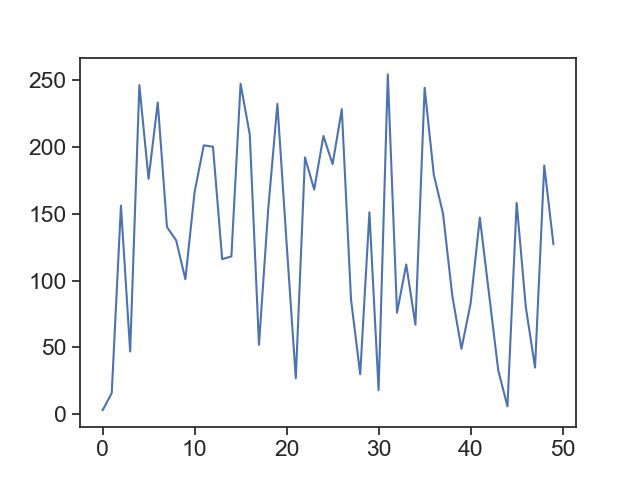

In [92]:
%matplotlib widget
data = [3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127]
data = np.array(data)
fig, ax = plt.subplots(1, 1)
ax.plot(data)

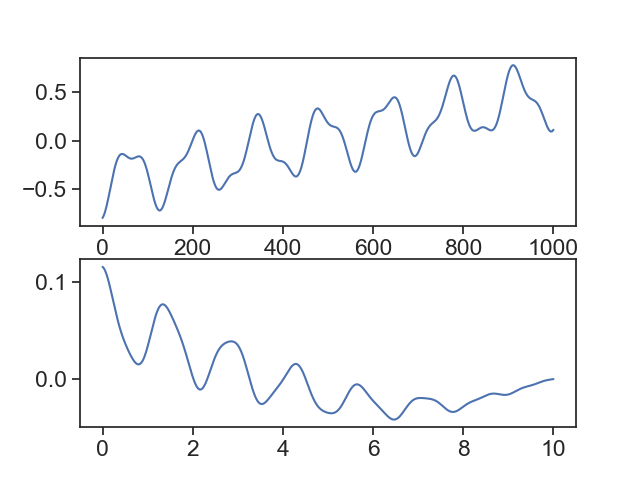

In [108]:
%matplotlib widget
dt = 0.01
t = np.arange(0, 10+dt, dt)
N = len(t)
signal = triple_sine(t)

tau = [0]
ac = [ac_calculate(signal, signal)/N]

for frame in np.arange(1, N, 1):
    sig1 = signal[frame:]
    sig2 = signal[:-frame]
    tau.append(frame * dt)
    ac.append(ac_calculate(sig1, sig2)/N)

fig, ax = plt.subplots(2, 1)
ax[0].plot(signal)
ax[1].plot(tau, ac)

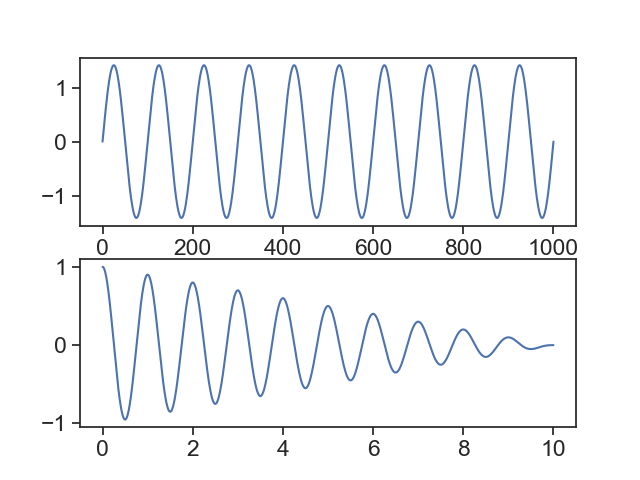

In [111]:
%matplotlib widget
dt = 0.01
t = np.arange(0, 10+dt, dt)
N = len(t)
signal = sine_wave(t)
avg = signal.mean()
std = signal.std()
signal = (signal - avg) / std

tau = [0]
ac = [ac_calculate(signal, signal)/N]

for frame in np.arange(1, N, 1):
    sig1 = signal[frame:]
    sig2 = signal[:-frame]
    tau.append(frame * dt)
    ac.append(ac_calculate(sig1, sig2)/N)

fig, ax = plt.subplots(2, 1)
ax[0].plot(signal)
ax[1].plot(tau, ac)

watch this, very good explanation of auto correlation and partial auto correlation  
<https://youtu.be/ZjaBn93YPWo>